In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib


In [3]:
# Loading the dataset from a CSV file and displaying the first few rows
df = pd.read_csv('Test1.csv')
df.head()

,Student_ID,Track,Preferred_Location,Preferred_Type,Major_Name,Tuition_Budget,Student_Grade,University_Name,University_Location,Tuition_Fees,Acceptance_Grade,Grade_Gap,Is_Budget_Sufficient,Is_Location_Match,Match
0,5821,Science,6th of October City,Private,Faculty of Nursing,83712,354.58,Misr University for Science and Technology,6th of October City,36000.0,371.31,-16.73,1,1,0
1,7165,Science,New Cairo,Private,Faculty of Nursing,270013,371.13,The American University in Cairo,New Cairo,700000.0,324.73,46.40,0,1,0
2,784,Math,Banha,Public,Faculty of Computer Sciences,35472,384.59,Banha University,Banha,1450.0,316.36,68.23,1,1,1
3,4092,Math,Giza,National,Faculty of Computer Sciences,108487,368.53,"Zewail City of Science, Technology and Innovation",Giza,89000.0,288.55,79.98,1,1,1
4,1848,Math,Helwan,Public,Faculty of Engineering,38001,394.10,Helwan University,Helwan,1350.0,303.98,90.12,1,1,1


In [4]:
df.isna().sum()# Checking for missing values in the dataset

Student_ID              0
Track                   0
Preferred_Location      0
Preferred_Type          0
Major_Name              0
Tuition_Budget          0
Student_Grade           0
University_Name         0
University_Location     0
Tuition_Fees            0
Acceptance_Grade        0
Grade_Gap               0
Is_Budget_Sufficient    0
Is_Location_Match       0
Match                   0
dtype: int64

In [5]:
# Displaying information about the dataset, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11334 entries, 0 to 11333
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            11334 non-null  int64  
 1   Track                 11334 non-null  object 
 2   Preferred_Location    11334 non-null  object 
 3   Preferred_Type        11334 non-null  object 
 4   Major_Name            11334 non-null  object 
 5   Tuition_Budget        11334 non-null  int64  
 6   Student_Grade         11334 non-null  float64
 7   University_Name       11334 non-null  object 
 8   University_Location   11334 non-null  object 
 9   Tuition_Fees          11334 non-null  float64
 10  Acceptance_Grade      11334 non-null  float64
 11  Grade_Gap             11334 non-null  float64
 12  Is_Budget_Sufficient  11334 non-null  int64  
 13  Is_Location_Match     11334 non-null  int64  
 14  Match                 11334 non-null  int64  
dtypes: float64(4), int6

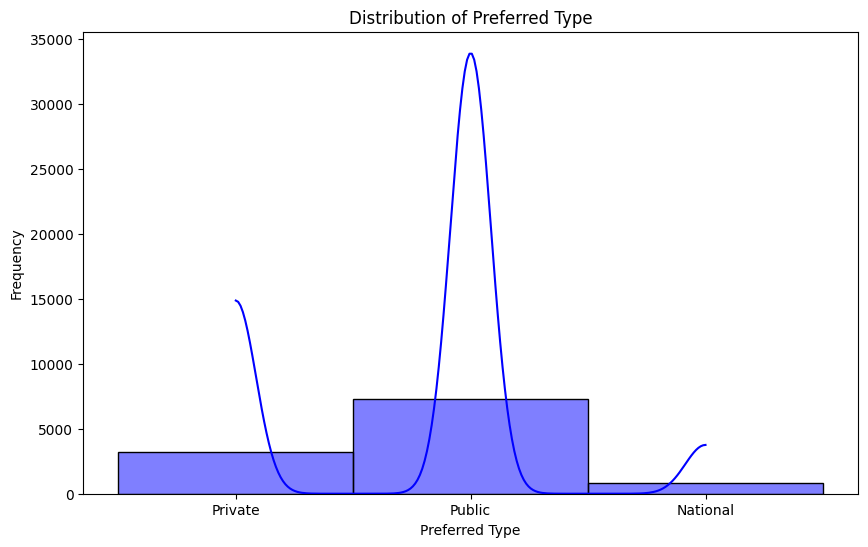

In [6]:
# Visualizing the distribution of the 'Preferred_Type' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Preferred_Type'], bins=3, kde=True, color='blue')
plt.title('Distribution of Preferred Type')
plt.xlabel('Preferred Type')
plt.ylabel('Frequency')
plt.show()

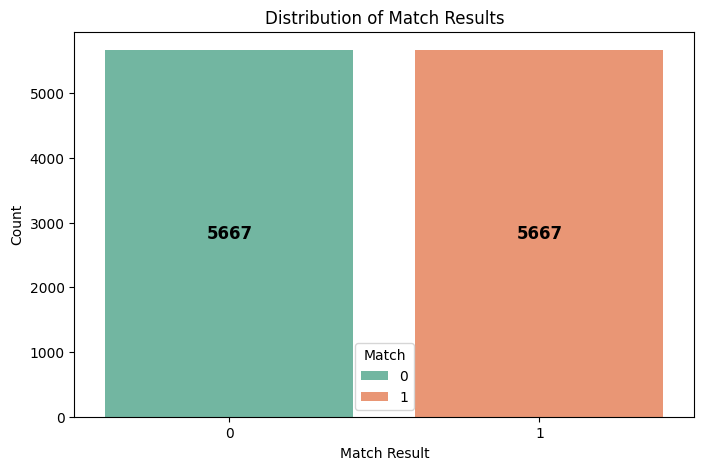

In [7]:
# Visualizing the distribution of the 'Match' column using a count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Match", data=df, palette="Set2", hue="Match")
# Adding labels to the bars in the count plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, fontweight="black")
# Setting plot titles and labels
plt.title("Distribution of Match Results")
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.show()

### **ML MODEL**

In [8]:
# Dropping unnecessary columns from the dataset
df = df.drop(columns=["Student_ID", "University_Name", "University_Location", "Major_Name"])

In [9]:
# Encoding categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=["Track", "Preferred_Location", "Preferred_Type"], drop_first=True)

# Splitting the dataset into features (X) and target variable (y)
X = df_encoded.drop("Match", axis=1)
y = df_encoded["Match"]

In [10]:
# Displaying the first few rows of the encoded dataset
df_encoded.head()

,Tuition_Budget,Student_Grade,Tuition_Fees,Acceptance_Grade,Grade_Gap,Is_Budget_Sufficient,Is_Location_Match,Match,Track_Math,Track_Science,...,Preferred_Location_Sadat City,Preferred_Location_Sharm El Sheikh,Preferred_Location_Sheikh Zayed,Preferred_Location_Shibin El Kom,Preferred_Location_Sohag,Preferred_Location_Suez,Preferred_Location_Tanta,Preferred_Location_Zagazig,Preferred_Type_Private,Preferred_Type_Public
0,83712,354.58,36000.0,371.31,-16.73,1,1,0,False,True,...,False,False,False,False,False,False,False,False,True,False
1,270013,371.13,700000.0,324.73,46.40,0,1,0,False,True,...,False,False,False,False,False,False,False,False,True,False
2,35472,384.59,1450.0,316.36,68.23,1,1,1,True,False,...,False,False,False,False,False,False,False,False,False,True
3,108487,368.53,89000.0,288.55,79.98,1,1,1,True,False,...,False,False,False,False,False,False,False,False,False,False
4,38001,394.10,1350.0,303.98,90.12,1,1,1,True,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# Checking the distribution of the target variable 'Match' as proportions
df.value_counts("Match", normalize=True)

Match
0    0.5
1    0.5
Name: proportion, dtype: float64

In [12]:
# Initializing the Gradient Boosting Classifier with specific hyperparameters
model = GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=0.01, max_depth=3)

In [13]:
# Selecting important features for the model
important_features = ['Is_Location_Match', 'Is_Budget_Sufficient', 'Grade_Gap']
X_important = X[important_features]

# Splitting the dataset into training and testing sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Training the model on the training set
model.fit(X_train_imp, y_train_imp)

# Making predictions on the test set
y_pred_imp = model.predict(X_test_imp)

# Evaluating the model's performance using accuracy and classification report
print("Accuracy:", accuracy_score(y_test_imp, y_pred_imp))
print("Classification Report:\n", classification_report(y_test_imp, y_pred_imp))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1141
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      2267
   macro avg       1.00      1.00      1.00      2267
weighted avg       1.00      1.00      1.00      2267



In [14]:
# Performing cross-validation to evaluate the model's performance

important_features = ['Is_Location_Match', 'Is_Budget_Sufficient', 'Grade_Gap']
X_important = X[important_features]

# Calculating cross-validation scores
scores = cross_val_score(model, X_important, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

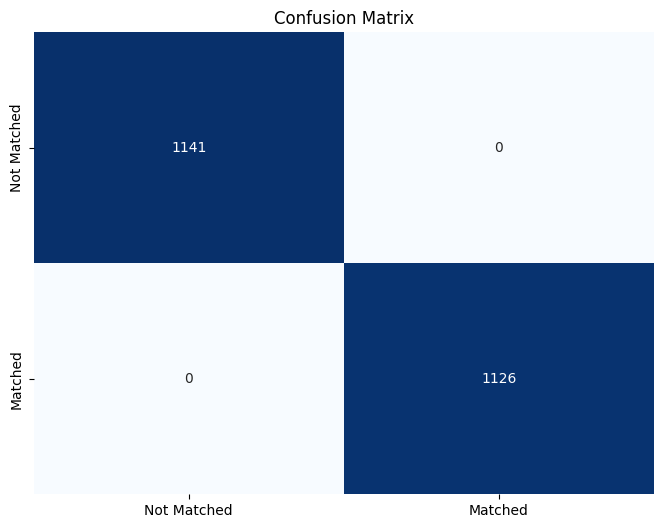

In [15]:
conf_matrix = confusion_matrix(y_test_imp, y_pred_imp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Matched', 'Matched'], yticklabels=['Not Matched', 'Matched'])
plt.title('Confusion Matrix')

In [16]:
new_student = {
    "Is_Location_Match": 1,  # Example: 1 if location matches
    "Is_Budget_Sufficient": 1,  # Example: 1 if budget is sufficient
    "Grade_Gap": 42.0  # Example: Positive grade gap
}

new_student_df = pd.DataFrame([new_student])
prediction = model.predict(new_student_df)
print("Prediction (Match):", prediction[0])  # 1 for match, 0 for no match

Prediction (Match): 1


In [17]:
# Saving the trained model to a file for future use
joblib.dump(model, "university_recommendation_model.pkl")

['university_recommendation_model.pkl']